<a href="https://colab.research.google.com/github/silvi3110/sis-252-inteligencia-artificial/blob/main/OpenCV6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# NOTEBOOK 6:DETECCION DE BORDES Y CONTORNOS

# IMPORTAMOS LAS LIBRERIAS NECESARIAS
import cv2  # Importamos opencv para procesamiento de imagenes
import numpy as np   # Importamos numpy para manejo de arrays
import matplotlib.pyplot as plt  # Importamos matplotlib para visualizacion
from google.colab.patches import cv2_imshow # Importamos cv2_imshow para mostrar imagenes en colab

In [30]:
# Cargar una imagen de ejemplo
from urllib.request import urlopen
# Cargar una imagen de ejemplo

# URL de una imagen de ejemplo
url= 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
# Abrimos la URL y leemos los bytes de la imagen
resp = urlopen(url)
# Convertimos los bytes a un array de numpy
image = np.asarray(bytearray(resp.read()), dtype="uint8")
# Decofidicamos el array como una imagen usando OpenCV
image = cv2.imdecode(image,cv2.IMREAD_COLOR)
# OpenCV carga las imagenes en formato BRG , lo convertimos a RGB para visualizacion correcta
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [31]:
# 1. Convertir la imagen a espacio de color HSV
# HSV (Hue, Saturation, Value ) es mejor para segmentacion por color
hsv_image = cv2. cvtColor(image, cv2.COLOR_BGR2HLS)

In [32]:
# 2. DEFINIR RANGOS de color para rastrear (en este caso, detectaremos tonos rojos)
# Rando bajo de rojo (Hue alrededor de 0)
lower_red1 = np.array([0, 100, 100]) # Valores HSV minimo
upper_red1 = np.array([10, 255, 255]) # Valores HSV maximo

# Rango alto de rojo (Hue alredeor de 180)
lower_red2 = np.array([160, 100, 100]) # Valores HSV minimos
upper_red2 = np.array([180, 255, 255]) # Valores HSV maximos

In [33]:
# 3. Crear mascaras para los rangos de color
# Aplicamos la primera mascara para el rango bajo de rojo
mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
# Aplicamos la segunda mascara para el rango alto de rojo
mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
# Combinamos las mascaras para detectar todo rango de rojo
red_mask = cv2.bitwise_or(mask1, mask2)

In [34]:
# 4. Aplicar la mascara a la imagen original
# El resultado mostrara solo las regiones rojas de la imagen
red_detected = cv2.bitwise_and(image_rgb, image_rgb, mask=red_mask)

In [35]:
# 5. Ahora detectamos objetos azules
# Definimos el rango de color azul en HSV
lower_blue = np.array([100, 150, 50]) # Valores hsv minimo
upper_blue = np.array([140, 255, 255]) # Valores hsv maximos

# Creamos la mascara paraa el rango azul
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Aplicamos la mascara a la imagen original
blue_detected = cv2.bitwise_and(image_rgb, image_rgb, mask=blue_mask)

In [36]:
# 6. Detectemos objetos verdes
# Definimos el rango de color verde en HSV
lower_green = np.array([40, 100, 50]) # Valores hsv minimo
upper_green = np.array([80, 255, 255]) # Valores hsv maximo

# Creamos la mascara para el rango verde
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Aplicamos la mascara a la imagen original
green_detected = cv2.bitwise_and(image_rgb, image_rgb, mask=green_mask)

In [37]:
# 7. Encontrar contornos en la máscara roja para marcar los objetos
# La función findContours requiere una imagen binaria (la máscara)
contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Creamos una copia de la imagen original para dibujar los contornos
contour_image = image_rgb.copy ()

# Dibujamos los contornos en la imagen
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2) # Color verde, grosor2

# Para cada contorno grande, dibujos de rectángulo y el centro
for contour in contours:
    # Solo procesamos contornos con área suficiente
    area = cv2.contourArea(contour)
    if area > 500: # Umbral de área para filtrar ruido
        # Obtenemos el rectángulo que encierra el contorno
        x, y, w, h = cv2.boundingRect(contour)
        # Dibujamos el rectángulo
        cv2.rectangle(contour_image, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Calculamos el centro del contorno
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            # Dibujamos el centro
            cv2.circle(contour_image, (cX, cY), 5, (0, 0, 255), -1)
            # Añadimos texto
            cv2.putText(contour_image, f"Centro", (cX - 20, cY - 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

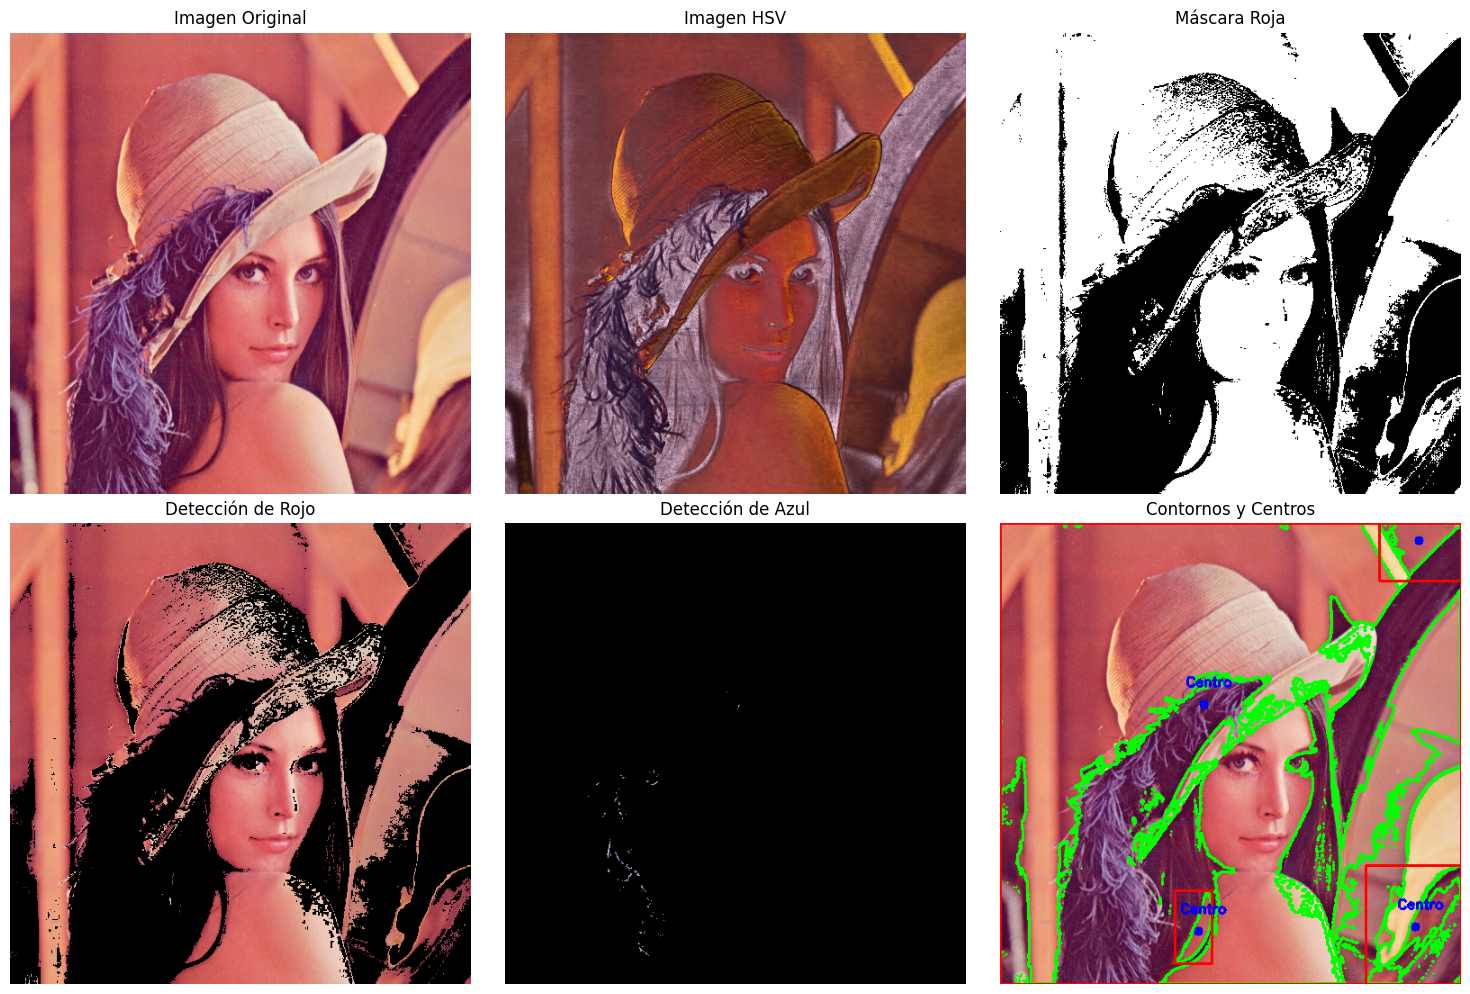

In [38]:
# 8. Visualización de los resultados
plt.figure(figsize=(15, 10)) # Creamos una figura con tamaño específico

# Imagen original
plt.subplot(2, 3, 1) # Creamos un subplot en la posición 1
plt.title('Imagen Original') # Añadimos un títulos
plt.imshow(image_rgb) # Mostramos la imagen original
plt.axis('off') # Ocultamos los ejes

# Imagen HSV
plt.subplot(2, 3, 2) # Creamo uun subplot en la posición 2
plt.title('Imagen HSV') # Añadimos un título
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)) # Convertimos HSV a RGB para visualizar
plt.axis('off') # Ocultamos los ejes

# Máscara roja
plt.subplot(2, 3, 3) # Creamos un subplot en la posición 3
plt.title('Máscara Roja') # Añadimos un título
plt.imshow(red_mask, cmap='gray') # Mostramos la máscara en escala de grises
plt.axis('off') # Ocultamos los ejes

# Detección de rojo
plt.subplot(2, 3, 4) # Creamos un subplot en la posición 4
plt.title('Detección de Rojo') # Añadimos un título
plt.imshow(red_detected) # Mostramos la imagen con solo objetos rojos
plt.axis('off') # Ocultamos los ejes

# Detección de azul
plt.subplot(2, 3, 5) # Creamos un subplot en la posición 5
plt.title('Detección de Azul') # Añadimos un título
plt.imshow(blue_detected) # Mostramos la imagen con solo objetos azules
plt.axis('off') # Ocultamos los ejes

# Contornos y centros
plt.subplot(2, 3, 6) # Creamos un subplot en la posición 6
plt.title('Contornos y Centros') # Añadimos un título
plt.imshow(contour_image) # Mostramos la imagen con contornos y centros
plt.axis('off') # Ocultamos los ejes

plt.tight_layout() # Ajustamos el layout para que no se superpongan los títulos
plt.show() # Mostramos la figura completa

In [39]:
# Información sobre la segmentación por color
print("Segmentación por color en HSV:")
print("1. HSV (Hue, Saturation, Value) separa el color (H) del brillo (V) y saturación (S).")
print("2. En OpenCV, el rango H va de 0-180 (no 0-360 como es habitual).")
print("3. Rangos típicos en HSV:")
print("   - Rojo: H = 0-10 o 160-180")
print("   - Verde: H = 40-80")
print("   - Azul: H = 100-140")
print(f"4. Se encontraron {len(contours)} contornos en la máscara roja.")
print("5. Esta técnica es útil para seguimiento de objetos en video.")

Segmentación por color en HSV:
1. HSV (Hue, Saturation, Value) separa el color (H) del brillo (V) y saturación (S).
2. En OpenCV, el rango H va de 0-180 (no 0-360 como es habitual).
3. Rangos típicos en HSV:
   - Rojo: H = 0-10 o 160-180
   - Verde: H = 40-80
   - Azul: H = 100-140
4. Se encontraron 445 contornos en la máscara roja.
5. Esta técnica es útil para seguimiento de objetos en video.
